In [3]:
import numpy as np
import random

# Алгоритм на основе отражений Хаусхолдера

### Создание матрицы [nxn]

In [4]:
n=4
A = np.array([[random.random() for i in range(n)] for j in range(n)])*100
print(A)

[[40.57324253 65.81319154 86.41706289 95.11729916]
 [39.46586038 53.39393525 28.27526113 79.69536067]
 [59.60997641 56.48302425 39.84873858 77.25900903]
 [95.81737709 77.12520393 12.09432429  8.38864523]]



### Пусть X — первый столбец матрицы A, ||X||=|$\alpha$|
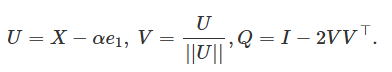

### где Q - матрица Хаусхолдера


In [5]:
def FindQ(A,n):
    I=np.eye(n)

    X=A[:,0]
    normX=np.linalg.norm(X,2)

    if normX < 1e-12:
        return I
    
    U=X-normX*I[:,0]
    V=U/np.linalg.norm(U,2)
    VT=V.reshape(n,1)
    
    Q=I-2*np.outer(V, V)
    return Q

In [6]:
I=np.eye(n)
Q=np.eye(n)
R=np.eye(n)
Ai=A


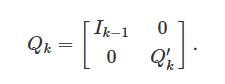

In [7]:
for i in range(n-1):
    An=Ai[i:n,i:n]
    Qn=FindQ(An,n-i)
    Qi=np.block([[np.eye(i), np.zeros([i,n-i])],[ np.zeros([n-i,i]), Qn]])
    Q=Qi@Q
    Ai=Qi@Ai
R=Q@A
Q=Q.T
print(R)

[[ 1.26246034e+02  1.23048449e+02  6.46068354e+01  9.83290206e+01]
 [-6.90452891e-15  3.43510831e+01  7.07661474e+01  9.97577562e+01]
 [ 1.10465212e-14  8.99355631e-15  2.86304559e+01  8.42092368e+00]
 [-8.32196544e-15 -8.75478670e-15  1.93531218e-15 -4.17954159e+01]]


In [8]:
def RSolution(A,b,n):
    x=np.zeros(n)
    for i in range(n-1,-1,-1):
        summ=0
        for j in range(i+1,n):
            summ+=A[i][j]*x[j]
        x[i]=(b[i]-summ)/A[i][i]
    return x

$$QR=b   \ \ \ => \ \ \    R=Q^Tb$$

In [10]:
b=np.array([random.random() for i in range(n)])
x=RSolution(R,Q.T@b,n)
print(f'A={A}')
print(f'b={b}')
print(f'x={x}')
print(A@x-b)

A=[[40.57324253 65.81319154 86.41706289 95.11729916]
 [39.46586038 53.39393525 28.27526113 79.69536067]
 [59.60997641 56.48302425 39.84873858 77.25900903]
 [95.81737709 77.12520393 12.09432429  8.38864523]]
b=[0.64233786 0.69033922 0.60176082 0.05315167]
x=[-0.001456    0.00206667 -0.00371006  0.00931493]
[-1.11022302e-16 -1.11022302e-16  1.11022302e-16  1.38777878e-16]
